In [1]:
# load data

import numpy as np
from utils import load_roi, load_config, load_mp3, get_envelope, downsample
import matplotlib.pyplot as plt

cfg = load_config()
DATADIR = cfg['DATA_DIR']
STIMDIR = cfg['STIM_DIR']
FIGDIR = cfg['FIG_DIR']

subject = 'sub-004'
task = 'treasureisland'

# load roi
roi_data, roi_labels = load_roi(DATADIR, subject, task)
tr_len = 1.5

# trim the first 8 trs and the last 13 trs
roi_data = roi_data[:, 8:-13]
n_trs = roi_data.shape[1]

# load stim
story_mp3, sr = load_mp3(STIMDIR, task)

# compute the envelope of the audio signal
envelope = get_envelope(story_mp3)
ds_envelope = downsample(envelope, sr, tr_len, n_trs)
ds_envelope = (ds_envelope - np.mean(ds_envelope)) / np.std(ds_envelope)

[INFO] utils.downsample - Downsampling to 553 samples.


/var/folders/r2/rgb930tj5ss_cmb9qkb2mfym0000gn/T/ipykernel_70833/1511577136.py:7: MatplotlibDeprecationWarning: Passing label as a length 23 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(np.linspace(0, tr_len * roi_data.shape[1], roi_data.shape[1]), roi_data[roi_idx[i], :] + i * 5, label=roi_labels[roi_idx[i]])
/var/folders/r2/rgb930tj5ss_cmb9qkb2mfym0000gn/T/ipykernel_70833/1511577136.py:7: MatplotlibDeprecationWarning: Passing label as a length 24 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(np.linspace(0, tr_len * roi_data.shape[1], roi_data.shape[1]), roi_data[roi_idx[i], :] + i * 5, label=roi_labels[roi_idx[i]])
/var/folders/r2/rgb930tj5ss_cmb9qkb2mfym0000gn/T/ipykernel_70833/1511577136.py:7: MatplotlibDeprecatio

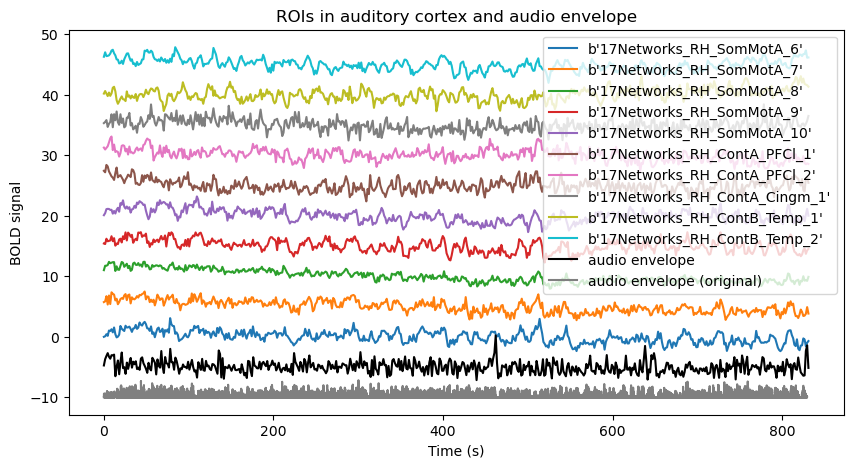

In [5]:
# plot the ROIs in auditory cortex and the audio envelope
ds_envelope = (ds_envelope - np.mean(ds_envelope)) / np.std(ds_envelope)
roi_idx = [117, 118, 119, 120, 121, 167, 168, 169, 170, 171]

plt.figure(figsize=(10, 5))
for i in range(len(roi_idx)):
    plt.plot(np.linspace(0, tr_len * roi_data.shape[1], roi_data.shape[1]), roi_data[roi_idx[i], :] + i * 5, label=roi_labels[roi_idx[i]])
plt.plot(np.linspace(0, tr_len * roi_data.shape[1], roi_data.shape[1] - 1), ds_envelope - 5, label='audio envelope', color='black')
plt.plot(np.linspace(0, len(envelope) / sr, len(envelope)), envelope - 10, label='audio envelope (original)', color='gray')

plt.xlabel('Time (s)')
plt.ylabel('BOLD signal')
plt.title('ROIs in auditory cortex and audio envelope')
plt.legend()
plt.show()

In [ ]:
# plot the audio signal and the two envelopes, together with the time series of the first 5 ROIs
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(story_mp3) / sr, len(envelope)), envelope, label='Hilbert Envelope')
for idx in range(5):
    plt.plot(np.linspace(0, len(roi_data[idx]) * tr_len, len(roi_data[idx])), roi_data[idx] + idx * 5, label=roi_labels[idx])
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.legend()
plt.show()